# Crop data

In this notebook, we will see how to crop the aita data.

In [1]:
import xarrayaita.loadData_aita as lda #here are some function to build xarrayaita structure
import xarrayaita.aita as xa

import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib widget

## Load your data

In [2]:
# path to data and microstructure
path_data='orientation_test.dat'
path_micro='micro_test.bmp'

In [3]:
data=lda.aita5col(path_data,path_micro)

In [4]:
data

<xarray.Dataset>
Dimensions:      (uvecs: 2, x: 1000, y: 2500)
Coordinates:
  * x            (x) float64 0.0 0.02 0.04 0.06 0.08 ... 19.92 19.94 19.96 19.98
  * y            (y) float64 49.98 49.96 49.94 49.92 49.9 ... 0.06 0.04 0.02 0.0
Dimensions without coordinates: uvecs
Data variables:
    orientation  (y, x, uvecs) float64 2.395 0.6451 5.377 ... 0.6098 0.6473
    quality      (y, x) int64 0 90 92 93 92 92 94 94 ... 96 96 96 96 96 97 97 96
    micro        (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    grainId      (y, x) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
Attributes:
    date:       Thursday, 19 Nov 2015, 11:24 am
    unit:       millimeters
    step_size:  0.02
    path_dat:   orientation_test.dat

## Use interactive crop for croping

```{note}
The option `rebuild_gId` can be use if you want to recompute the grainId labelling. If you use this function it will change the grainId label of every grain. It can be usefull the grain boundary on the border are not close. By default the `rebuild_gId=True`.
```

In [5]:
help(xa.aita.interactive_crop)

Help on function interactive_crop in module xarrayaita.aita:

interactive_crop(self, rebuild_gId=True)
    out=data.aita.interactive_crop()
    
    :param rebuild_gId: recompute the grainID
    :type rebuild_gId: bool
    
    This function can be use to crop within a jupyter notebook
    It will crop the data and export the value of the crop in out.pos



1. click and drag the mouse on the figure to selecte the area
2. you can draw the rectangle using the button "Draw area"
3. if you are unhappy with the selection restart to 1.
4. if you are happy with the selection click on "Export crop" (only the last rectangle is taken into account)


<IPython.core.display.Javascript object>


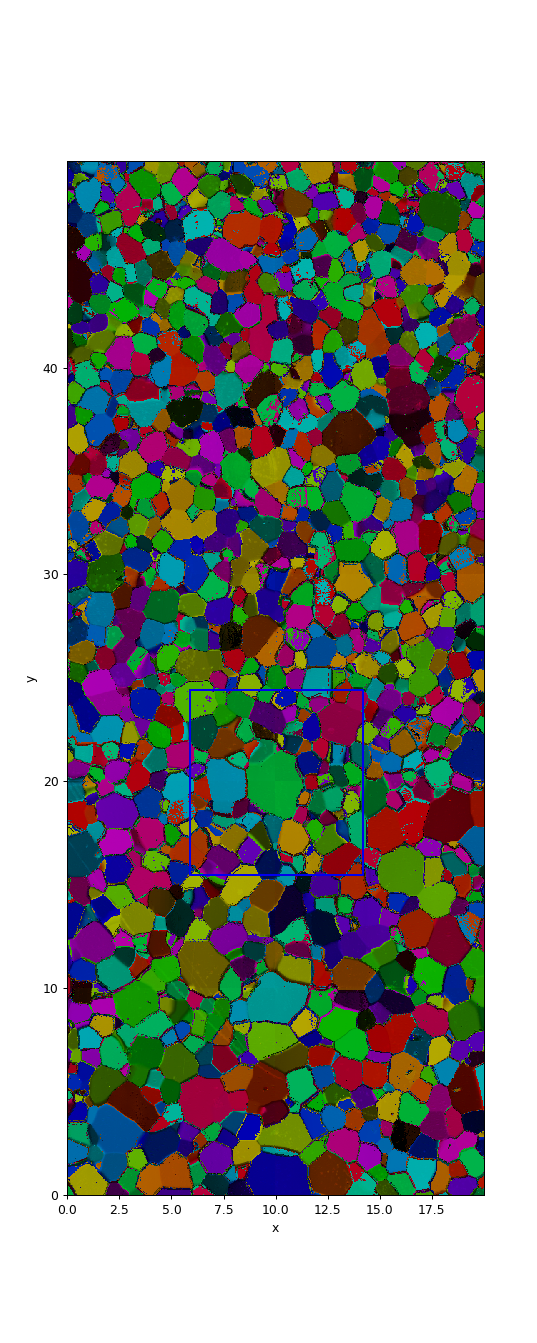

Button(description='Draw area', style=ButtonStyle())

Button(description='Export crop', style=ButtonStyle())

In [6]:
out=data.aita.interactive_crop()

The rectangle coordinate are given in out.crop. In out.crop[0] are the x coordinate of the rectangle corner and in out.crop[1] the y coordinate

In [7]:
print('Corner, x coordinate :',out.crop[0])
print('Corner, y coordinate :',out.crop[1])

Corner, x coordinate : (5.865987063172045, 14.210073084677422, 14.210073084677422, 5.865987063172045)
Corner, y coordinate : (15.474126984126983, 15.474126984126983, 24.391875901875906, 24.391875901875906)


The new data can be found in out.ds

<IPython.core.display.Javascript object>


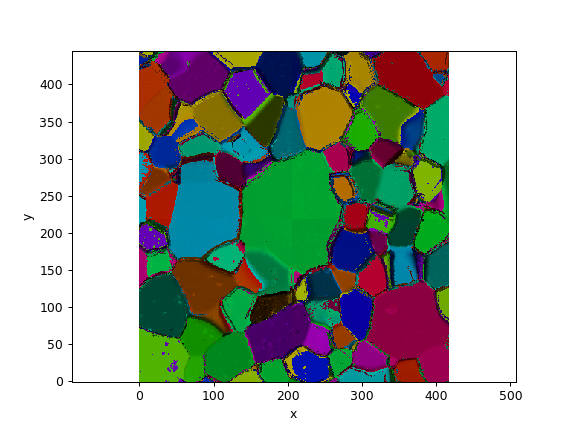

(-0.5, 416.5, -0.5, 445.5)

In [8]:
plt.figure()
out.ds.orientation.uvecs.calc_colormap().plot.imshow()
plt.axis('equal')

In [9]:
out.ds

<xarray.Dataset>
Dimensions:      (uvecs: 2, x: 417, y: 446)
Coordinates:
  * x            (x) float64 5.88 5.9 5.92 5.94 5.96 ... 14.14 14.16 14.18 14.2
  * y            (y) float64 24.38 24.36 24.34 24.32 ... 15.54 15.52 15.5 15.48
Dimensions without coordinates: uvecs
Data variables:
    orientation  (y, x, uvecs) float64 1.513 1.502 1.51 ... 0.5419 2.896 1.025
    quality      (y, x) float64 85.0 89.0 90.0 90.0 90.0 ... 0.0 0.0 15.0 80.0
    micro        (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    grainId      (y, x) int64 1 1 1 1 1 1 1 1 ... 101 101 101 101 101 101 101
Attributes:
    date:       Thursday, 19 Nov 2015, 11:24 am
    unit:       millimeters
    step_size:  0.02
    path_dat:   orientation_test.dat

## Overwrite the data
If you want to overwrite the variable `data`.

In [10]:
data=out.ds

In [11]:
data

<xarray.Dataset>
Dimensions:      (uvecs: 2, x: 417, y: 446)
Coordinates:
  * x            (x) float64 5.88 5.9 5.92 5.94 5.96 ... 14.14 14.16 14.18 14.2
  * y            (y) float64 24.38 24.36 24.34 24.32 ... 15.54 15.52 15.5 15.48
Dimensions without coordinates: uvecs
Data variables:
    orientation  (y, x, uvecs) float64 1.513 1.502 1.51 ... 0.5419 2.896 1.025
    quality      (y, x) float64 85.0 89.0 90.0 90.0 90.0 ... 0.0 0.0 15.0 80.0
    micro        (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    grainId      (y, x) int64 1 1 1 1 1 1 1 1 ... 101 101 101 101 101 101 101
Attributes:
    date:       Thursday, 19 Nov 2015, 11:24 am
    unit:       millimeters
    step_size:  0.02
    path_dat:   orientation_test.dat